In [4]:
import pandas as pd
import numpy as np

In [5]:
inp=pd.read_csv("googleplaystore_v2.csv")

In [6]:
inp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
#removing the incorrect data type and missing values

In [9]:
inp.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [10]:
# handling missing values for rating
# rating is the target variable
# drop record (safe optrn ) on missing values

In [11]:
inp1=inp[-inp.Rating.isnull()]

In [12]:
inp1.shape

(9367, 13)

In [13]:
inp1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [14]:
#Explore and understand the nulls for the column andriod version

In [15]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# in the last row the values has been shifted to the left so it would be better to remove the row

In [17]:
#then other two row we will try to fix the solution

In [18]:
inp1.loc[10472,:]

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,1.9
Rating,19.0
Reviews,3.0M
Size,21516.529524
Installs,Free
Type,0
Price,Everyone
Content Rating,NaN
Genres,"February 11, 2018"


In [19]:
inp1[(inp1['Android Ver'].isnull() & (inp1.Category=='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
inp1=inp1[-(inp1['Android Ver'].isnull() & (inp1.Category=='1.9'))]

In [21]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [22]:
inp1['Android Ver'].value_counts()

,count
Android Ver,
4.1 and up,2059
Varies with device,1319
4.0.3 and up,1240
4.0 and up,1131
4.4 and up,875
2.3 and up,582
5.0 and up,535
4.2 and up,338
2.3.3 and up,240


In [23]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [24]:
inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

<ipython-input-24-93fb2ea7e912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


In [25]:
inp1['Android Ver'].isnull().sum()

0

In [26]:
inp1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [27]:
inp1[inp1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [28]:
inp1['Current Ver'].value_counts()

,count
Current Ver,
Varies with device,1415
1.0,458
1.1,195
1.2,126
1.3,120
...,...
2.9.10,1
3.18.5,1
1.3.A.2.9,1


In [29]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
inp1['Current Ver']=inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [31]:
inp1['Current Ver'].isnull().sum()

0

In [32]:
inp1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [33]:
#changing the incorrect datatype

In [34]:
inp.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,float64
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [35]:
inp1.Price.value_counts()

,count
Price,
0,8719
$2.99,114
$0.99,107
$4.99,70
$1.99,59
...,...
$1.29,1
$299.99,1
$379.99,1


In [36]:
inp1.Price=inp1.Price.apply(lambda x: 0 if(x=='0') else float(x[1:]))

In [39]:
inp1.groupby('Android Ver')["Price"].mean()

,Price
Android Ver,
1.0 and up,0.000000
1.5 and up,0.871250
1.6 and up,5.463448
2.0 and up,0.257407
2.0.1 and up,1.921429
2.1 and up,0.529292
2.2 and up,1.069519
2.3 and up,0.392165
2.3.3 and up,0.444708


In [40]:
inp1.dtypes


,0
App,object
Category,object
Rating,float64
Reviews,object
Size,float64
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [41]:
inp1.Price.value_counts()

,count
Price,
0.00,8719
2.99,114
0.99,107
4.99,70
1.99,59
...,...
1.29,1
299.99,1
379.99,1


In [42]:
inp1.Reviews.value_counts()

,count
Reviews,
2,83
3,78
4,74
5,74
1,67
...,...
49657,1
41420,1
7146,1


In [43]:
inp1.Reviews=inp1.Reviews.astype(int)

In [44]:
inp1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [45]:
inp1.Reviews.describe()

,Reviews
count,9.366000e+03
mean,5.140498e+05
std,3.144042e+06
min,1.000000e+00
25%,1.862500e+02
50%,5.930500e+03
75%,8.153275e+04
max,7.815831e+07


In [46]:
inp1.Price.describe()

,Price
count,9366.000000
mean,0.960928
std,15.816585
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [47]:
inp1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [48]:
inp1.Installs.value_counts()

,count
Installs,
"1,000,000+",1577
"10,000,000+",1252
"100,000+",1150
"10,000+",1010
"5,000,000+",752
"1,000+",713
"500,000+",538
"50,000+",467
"5,000+",432


In [49]:
inp1.Installs=inp1.Installs.apply(lambda x: int(x.replace(",","").replace("+","")))

In [50]:
inp1.Installs.value_counts()

,count
Installs,
1000000,1577
10000000,1252
100000,1150
10000,1010
5000000,752
1000,713
500000,538
50000,467
5000,432


In [51]:
inp1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [52]:
inp1.Installs.describe()

,Installs
count,9.366000e+03
mean,1.789744e+07
std,9.123822e+07
min,1.000000e+00
25%,1.000000e+04
50%,5.000000e+05
75%,5.000000e+06
max,1.000000e+09


# sanity check on data

In [53]:
# avg rating between 1-5



In [54]:
inp1.Rating.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [55]:
#Reviews should be less or equal to no. of installs

In [56]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [57]:
#drop the records for now

In [58]:
inp1=inp1[-(inp1.Reviews>inp1.Installs)]

In [59]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [60]:
# for free app the price should be zero

In [61]:
inp1[((inp1.Price>0) & (inp1.Type =="Free"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [62]:
inp1.Price.describe()

,Price
count,9359.000000
mean,0.961116
std,15.822478
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [63]:
inp1.Installs.describe()

,Installs
count,9.359000e+03
mean,1.791083e+07
std,9.127102e+07
min,5.000000e+00
25%,1.000000e+04
50%,5.000000e+05
75%,5.000000e+06
max,1.000000e+09


In [64]:
inp1.Rating.describe()

,Rating
count,9359.000000
mean,4.191174
std,0.514966
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [65]:
# Identifying and handling outliers/extreme values

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

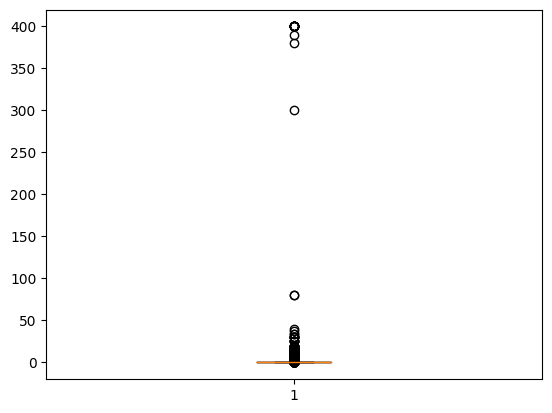

In [67]:
plt.boxplot(inp1.Price)
plt.show()

In [68]:
inp1.Price.value_counts()

,count
Price,
0.00,8715
2.99,114
0.99,106
4.99,70
1.99,59
...,...
1.29,1
299.99,1
379.99,1


In [69]:
inp1[inp1["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [70]:
inp1=inp1[-(inp1["Price"]>200)]


In [71]:
inp1.Price.describe()

,Price
count,9344.000000
mean,0.334463
std,2.169925
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,79.990000


In [72]:
inp1[inp1["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<Axes: >

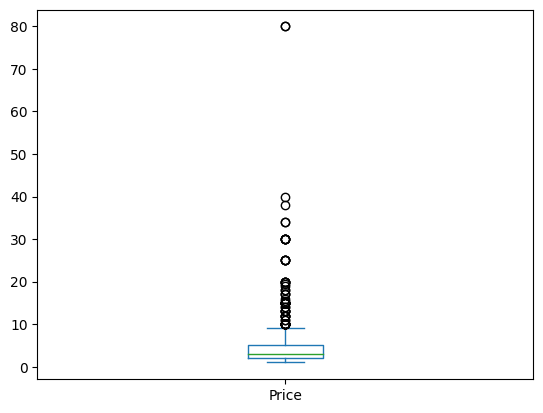

In [73]:
inp1[inp1.Price>0].Price.plot.box()

In [74]:
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [75]:
inp1=inp1[inp1.Price<=30]

In [76]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [77]:
#Reviews

In [78]:
?plt.hist

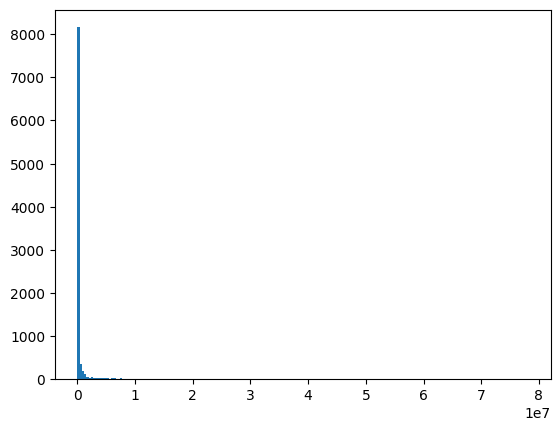

In [79]:
plt.hist(inp1.Reviews, bins=200)
plt.show()

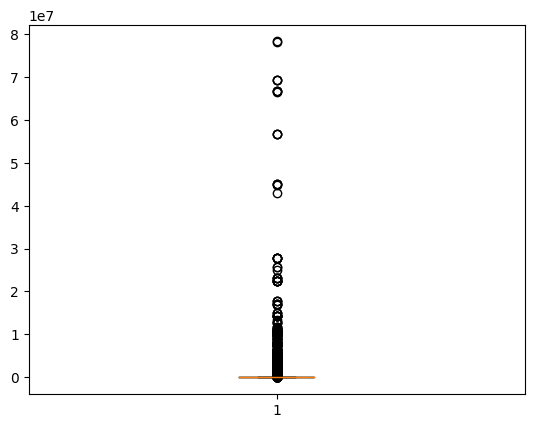

In [80]:
plt.boxplot(inp1.Reviews)
plt.show()

In [81]:
inp1=inp1[inp1["Reviews"]<=1000000]

In [82]:
inp1[-inp1["Reviews"]<=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [83]:
inp1.shape

(8634, 13)

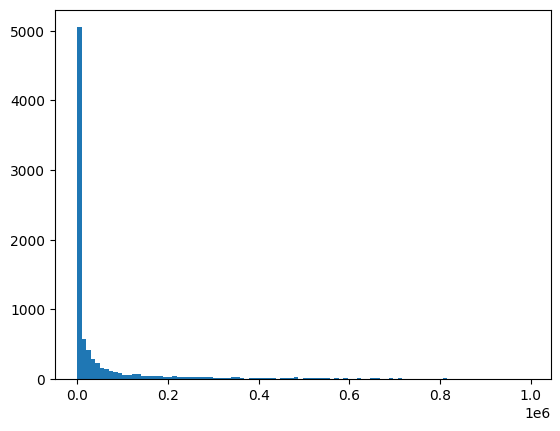

In [84]:
plt.hist(inp1.Reviews , bins=100)
plt.show()

In [85]:
inp1.Installs.describe()

,Installs
count,8.634000e+03
mean,4.288536e+06
std,2.864650e+07
min,5.000000e+00
25%,1.000000e+04
50%,1.000000e+05
75%,1.000000e+06
max,1.000000e+09


In [86]:
1.000000e+06-1.000000e+04

990000.0

In [87]:
inp1[inp1.Installs>100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3476,Google Calendar,PRODUCTIVITY,4.2,858208,21516.529524,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3533,Google Calendar,PRODUCTIVITY,4.2,858227,21516.529524,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3562,Google Calendar,PRODUCTIVITY,4.2,858230,21516.529524,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,21516.529524,500000000,Free,0.0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,21516.529524,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000.000000,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


In [88]:
inp1=inp1[inp1["Installs"]<=100000000]

In [89]:
inp1.shape

(8624, 13)

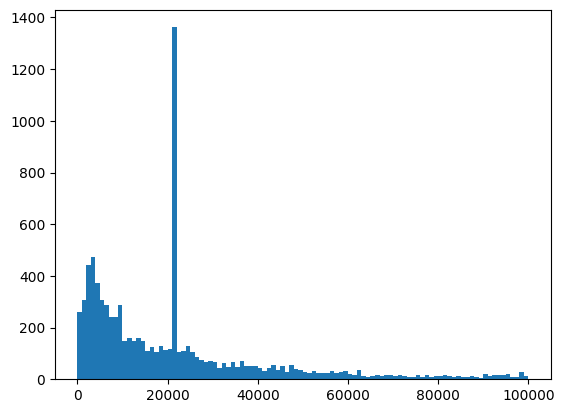

In [90]:
plt.hist(inp1.Size,bins=100)
plt.show()

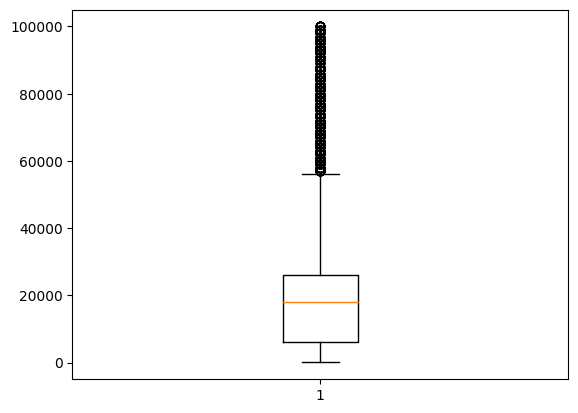

In [91]:
plt.boxplot(inp1.Size)
plt.show()

In [92]:
#Data analysis to answer the business questions

In [93]:
import warnings
warnings.filterwarnings("ignore")

(array([  17.,   18.,   41.,   74.,  136.,  446.,  866., 1625., 3664.,
        1737.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

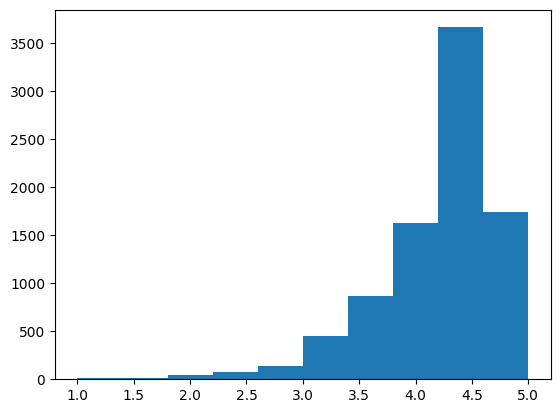

In [94]:
plt.hist(inp1.Rating)

In [95]:
#seaborn

In [96]:
import seaborn as sns

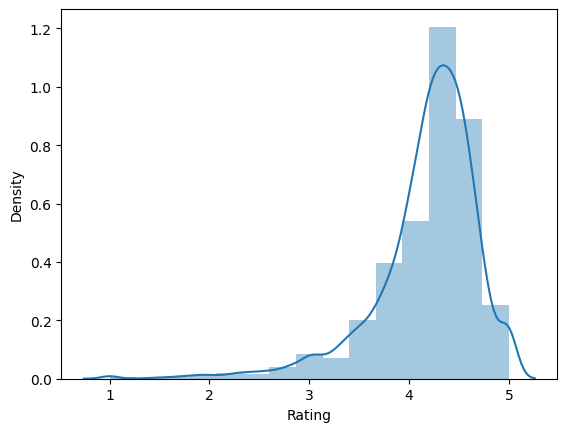

In [97]:
sns.distplot(inp1.Rating,bins=15)
plt.show()

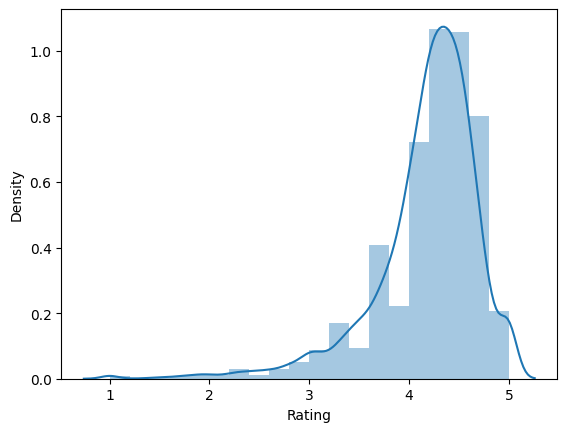

In [98]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

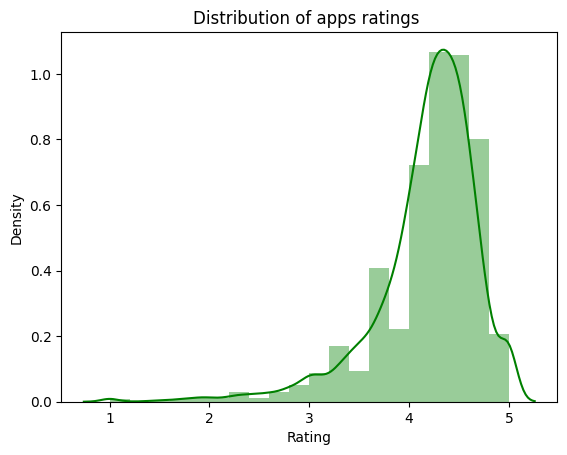

In [99]:
sns.distplot(inp1.Rating , bins=20,color='g')
plt.title("Distribution of apps ratings ", fontsize=12)
plt.show()

In [100]:
?sns.set_style

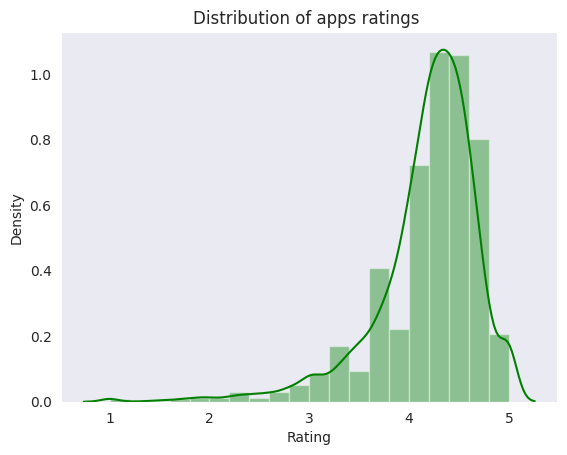

In [101]:
sns.set_style("dark")
sns.distplot(inp1.Rating , bins=20,color='g')
plt.title("Distribution of apps ratings ", fontsize=12)
plt.show()

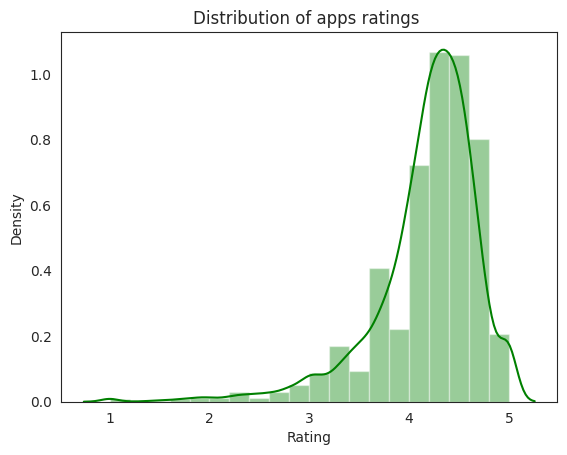

In [102]:
sns.set_style("white")
sns.distplot(inp1.Rating , bins=20,color='g')
plt.title("Distribution of apps ratings ", fontsize=12)
plt.show()

Matplotlib theme or style

In [103]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [104]:
# plt.style.use( 'tableau-colorblind10')


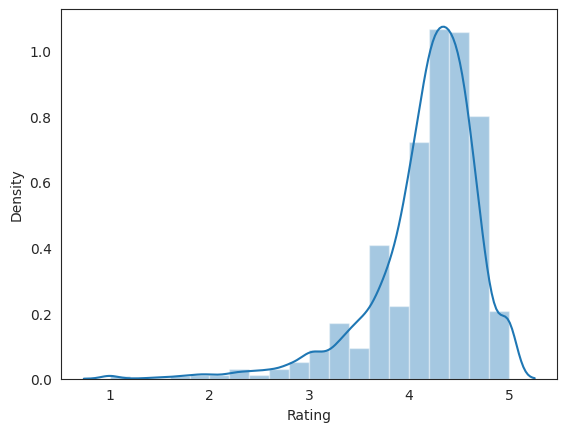

In [105]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

In [106]:
# plt.style.use('ggplot')

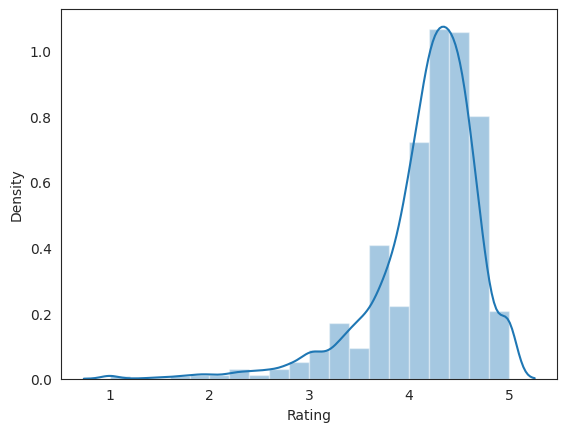

In [107]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

In [108]:
# plt.style.use('dark_background')

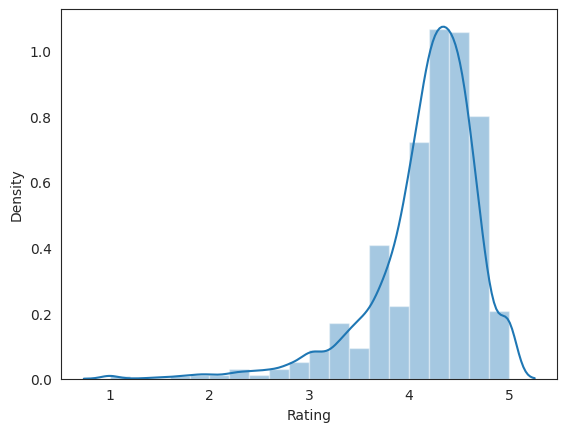

In [109]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

In [110]:
inp1["Content Rating"].value_counts()

,count
Content Rating,
Everyone,6938
Teen,928
Mature 17+,417
Everyone 10+,337
Adults only 18+,3
Unrated,1


In [111]:
# dropping records for adults only 18+ and unrated

In [112]:
inp1=inp1[-inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [113]:
inp1['Content Rating'].value_counts()

,count
Content Rating,
Everyone,6938
Teen,928
Mature 17+,417
Everyone 10+,337


In [114]:
inp1.reset_index(inplace=True,drop=True)

In [115]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int64  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 875.6+ KB


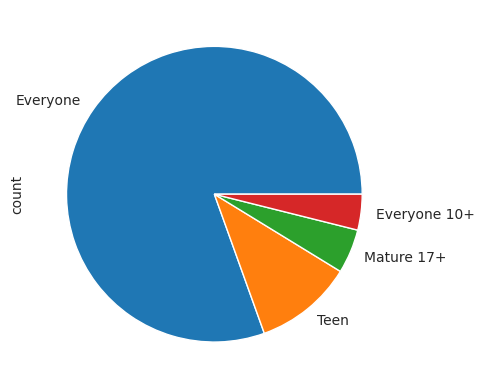

In [116]:
# plt.style.use('seaborn-v0_8-bright')
inp1["Content Rating"].value_counts().plot.pie()
plt.show()

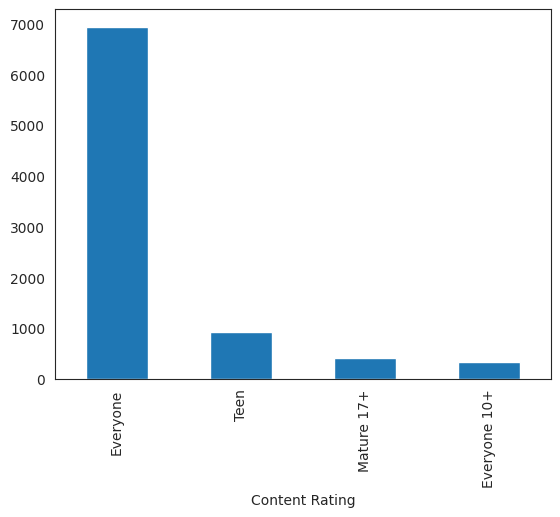

In [117]:
# plt.style.use('seaborn-v0_8-bright')
inp1["Content Rating"].value_counts().plot.bar()
plt.show()

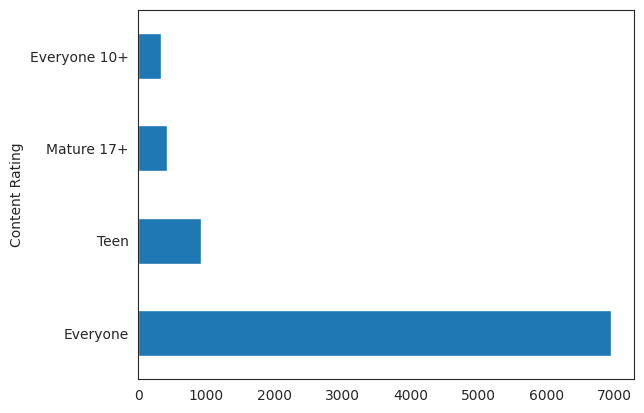

In [118]:
# plt.style.use('seaborn-v0_8-bright')
inp1["Content Rating"].value_counts().plot.barh()
plt.show()

<Axes: ylabel='Android Ver'>

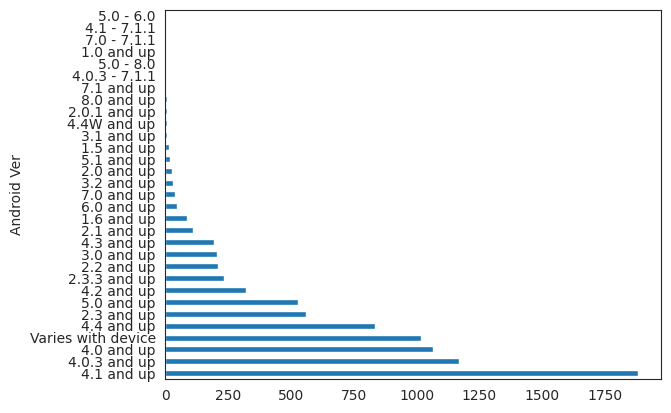

In [119]:
inp1["Android Ver"].value_counts().plot.barh()

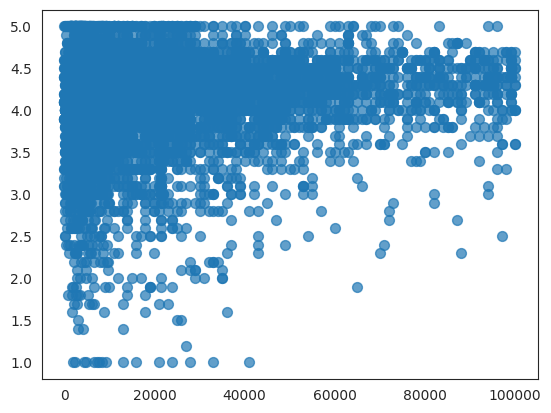

In [120]:
# plt.style.use('_classic_test_patch')
plt.scatter(inp1.Size,inp1.Rating,alpha=0.7,s=50)

In [121]:
sns.set_style("white")

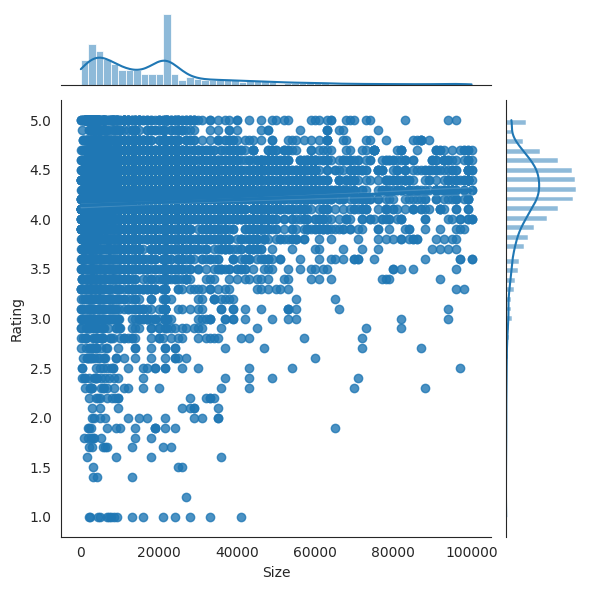

In [122]:
j=sns.jointplot(data=inp1,x='Size',y='Rating',kind='reg')
plt.show()

In [123]:
#Import this library
import scipy.stats as stats

#Change the code to the following


In [124]:
j.annotate(stats.pearsonr)

AttributeError: 'JointGrid' object has no attribute 'annotate'

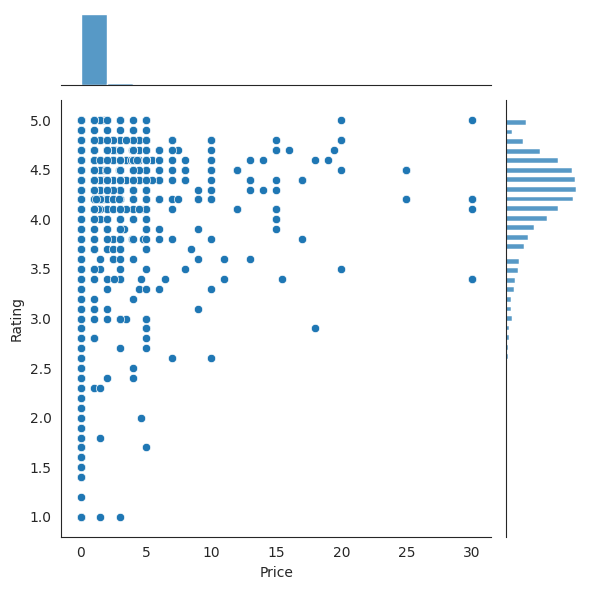

In [125]:
sns.jointplot(data=inp1,x='Price',y='Rating')
plt.show()

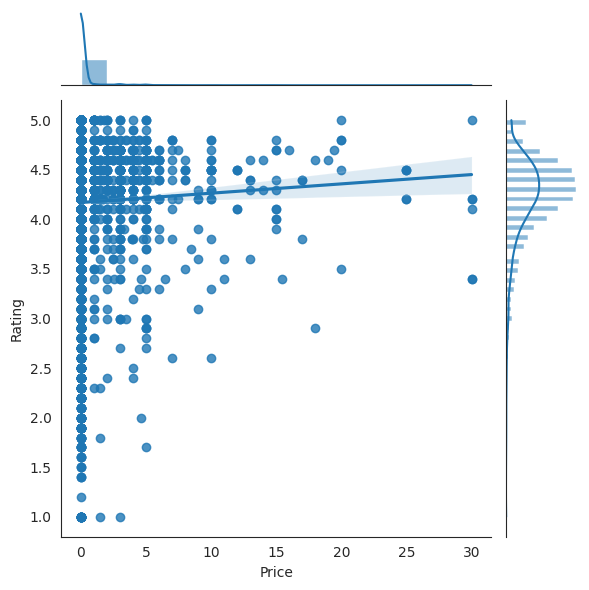

In [126]:
sns.jointplot(data=inp1,x='Price',y='Rating',kind='reg')

# pair plot

In [127]:
?sns.pairplot()

Object `sns.pairplot()` not found.


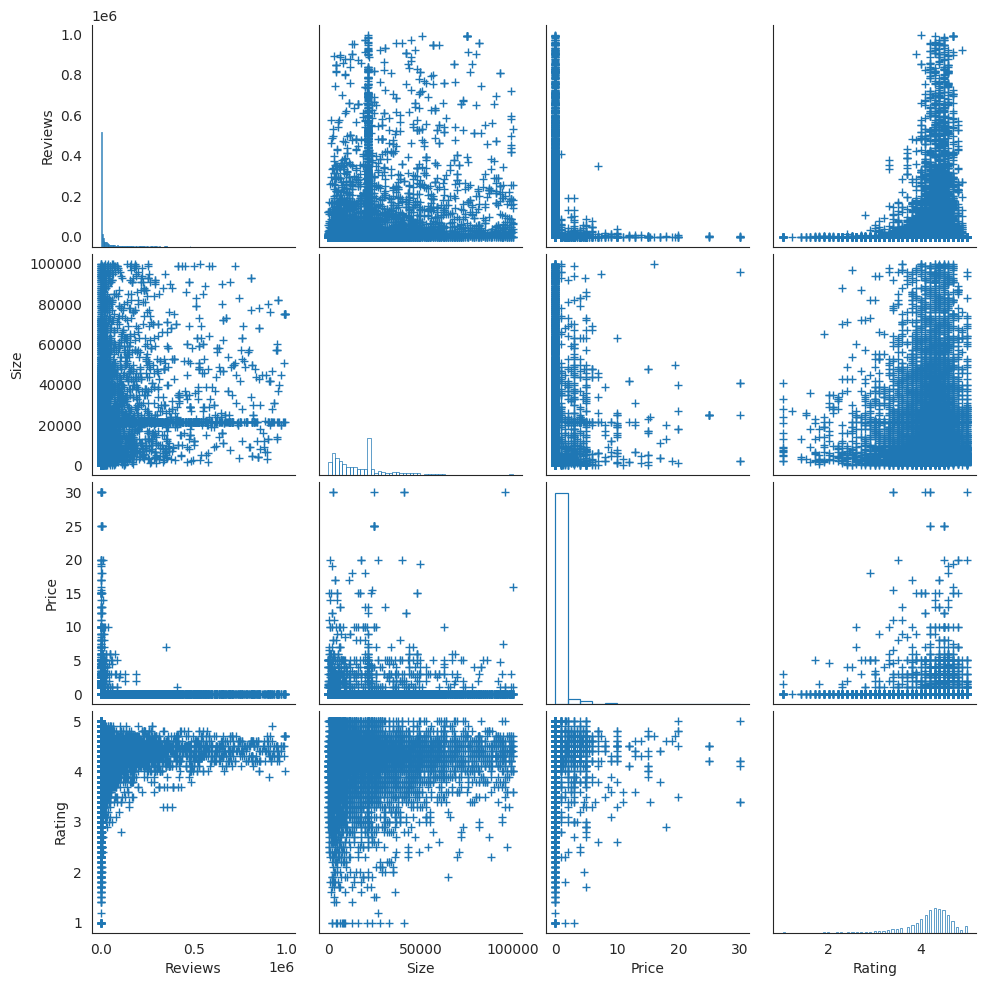

In [128]:
sns.pairplot(inp1[["Reviews","Size","Price","Rating"]], plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))

In [129]:
#numerical and character feature

In [130]:
#content rating vs rating

In [131]:
inp1['Content Rating'].value_counts()

,count
Content Rating,
Everyone,6938
Teen,928
Mature 17+,417
Everyone 10+,337


<Axes: xlabel='Content Rating'>

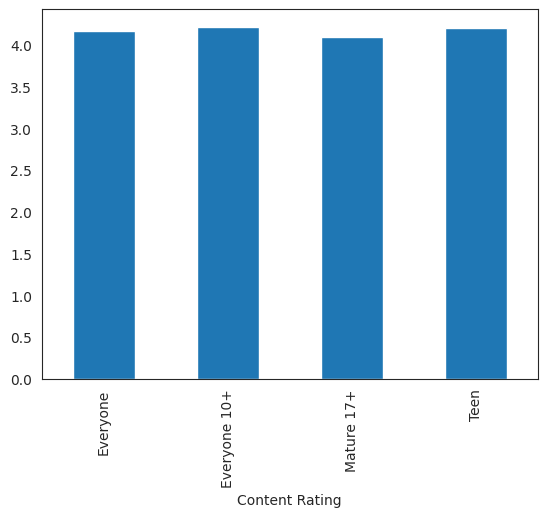

In [132]:
inp1.groupby(by=['Content Rating'])["Rating"].mean().plot.bar()

<Axes: xlabel='Content Rating'>

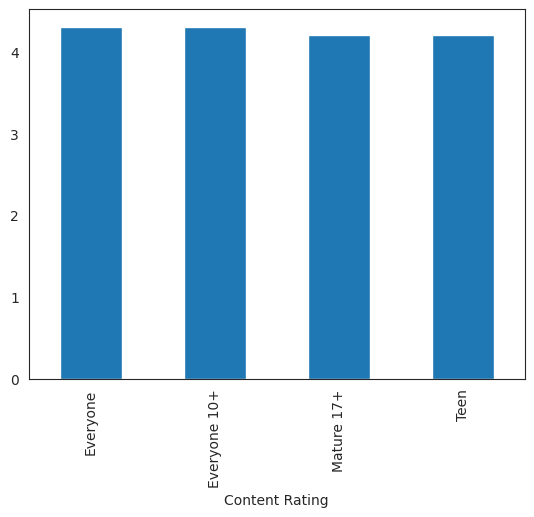

In [133]:
inp1.groupby(by=['Content Rating'])["Rating"].median().plot.bar()

<Axes: >

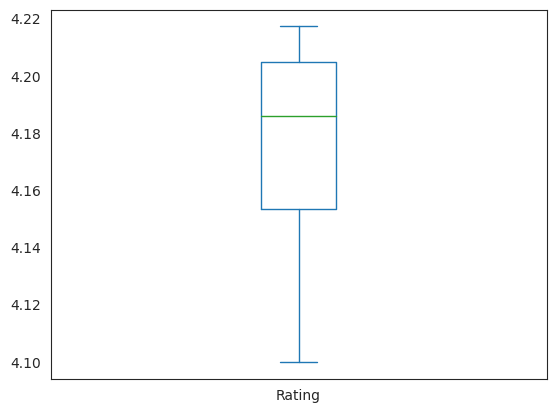

In [134]:
inp1.groupby(by=['Content Rating'])["Rating"].mean().plot.box()

<Axes: xlabel='Content Rating', ylabel='Rating'>

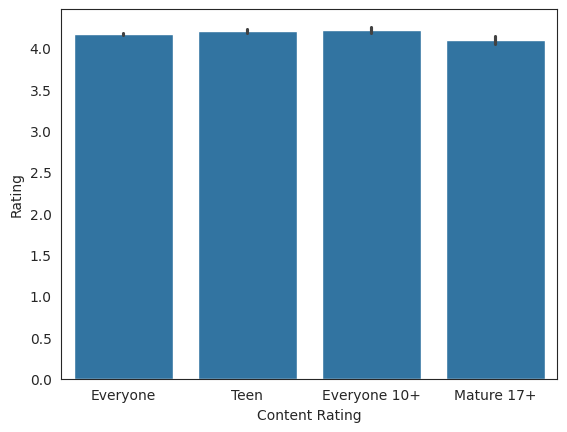

In [135]:
sns.barplot(data=inp1,x="Content Rating",y="Rating")

<Axes: xlabel='Content Rating', ylabel='Rating'>

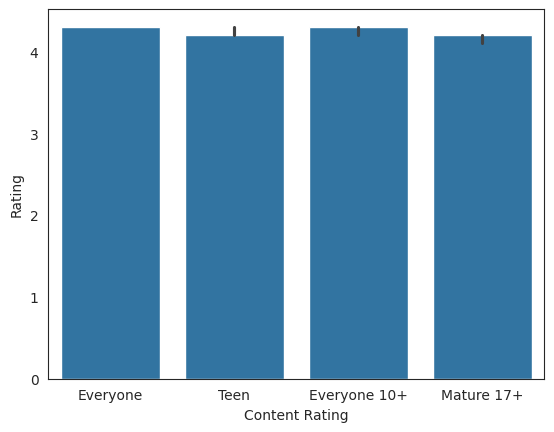

In [136]:
sns.barplot(data=inp1,x="Content Rating",y="Rating" , estimator=np.median
           )

<Axes: xlabel='Content Rating', ylabel='Rating'>

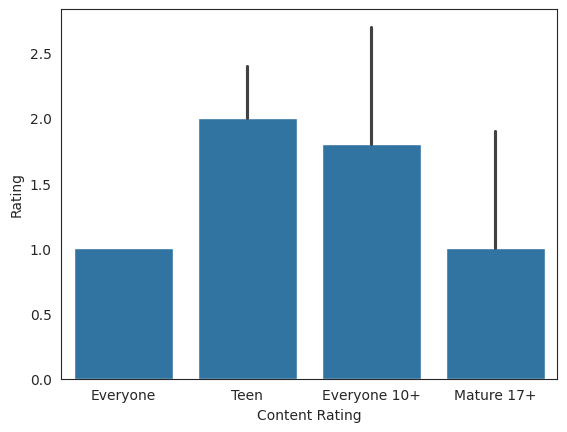

In [137]:
sns.barplot(data=inp1,x="Content Rating",y="Rating", estimator=np.min)

In [138]:
sns.boxplot(inp1["Content Rating"],inp1.Rating)
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
plt.figure(figsize=[9,7])
sns.boxplot(data=inp1,x="Content Rating",y="Rating")

In [ ]:
plt.boxplot(inp1.Rating)

In [139]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8616,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8617,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8618,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [140]:
plt.figure(figsize=[90,98])
sns.boxplot(data=inp1,x="Genres",y="Rating")

<Axes: xlabel='Genres', ylabel='Rating'>

# Heatmap!

In [141]:
# Rating vs size vs content Rating

In [142]:
?pd.qcut

In [143]:
inp1['Size_Bucket']=pd.qcut(inp1.Size ,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [144]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL
8616,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH
8617,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL
8618,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M


In [145]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [146]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [147]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x : np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [148]:
res=pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x : np.quantile(x,0.2))

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

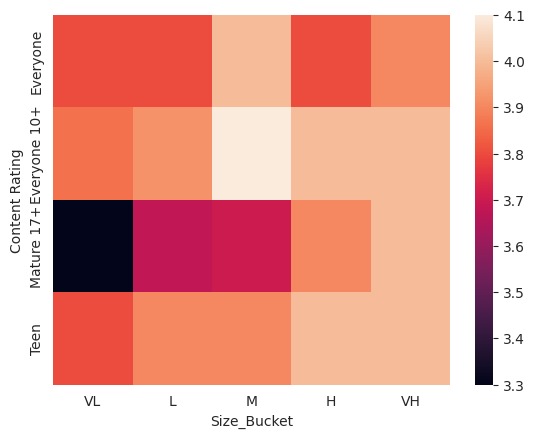

In [149]:
sns.heatmap(res)

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

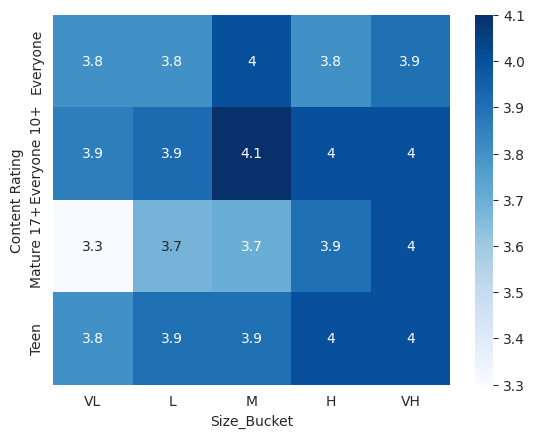

In [150]:
sns.heatmap(res,cmap='Blues',annot=True)

In [151]:
#wrong heatmap

In [152]:
# Analyse the rating by month

In [153]:
inp1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [154]:
inp1["Last Updated"].head()

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [155]:
inp1['Updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month

<Axes: xlabel='Updated_month'>

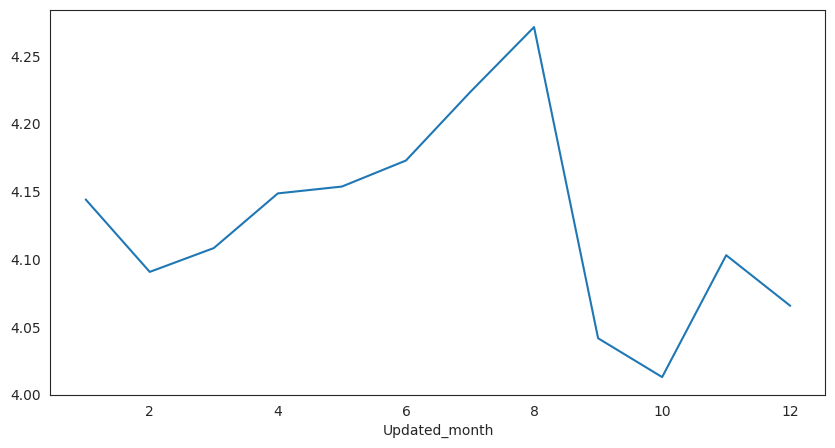

In [156]:
plt.figure(figsize=[10,5])
inp1.groupby(by=['Updated_month'])["Rating"].mean().plot()

In [157]:
pd.pivot_table(data=inp1,values="Installs",index="Updated_month",columns="Content Rating",aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [158]:
monthly=pd.pivot_table(data=inp1,values="Installs",index="Updated_month",columns="Content Rating",aggfunc=sum)

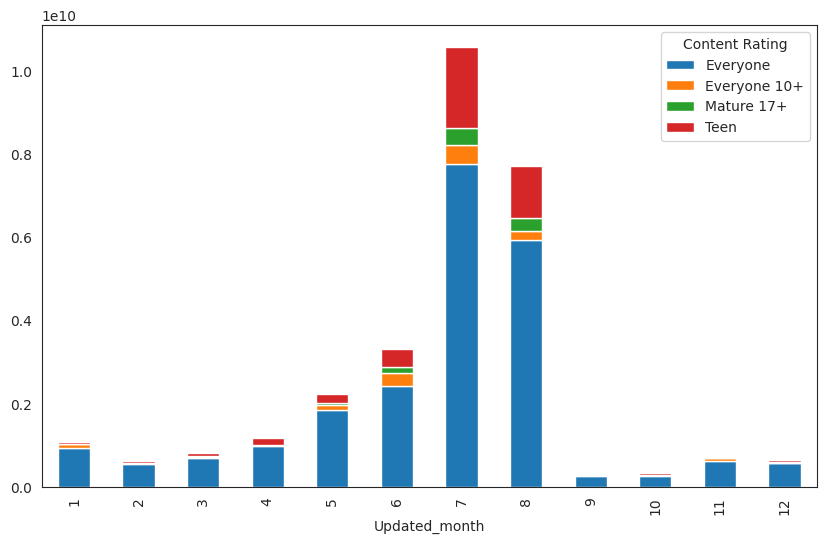

In [159]:
monthly.plot(kind='bar',stacked="True",figsize=[10,6])
plt.show()

In [160]:
# Get proportions insted of aboslute values

In [161]:
monthly_prec=monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(),axis=1)

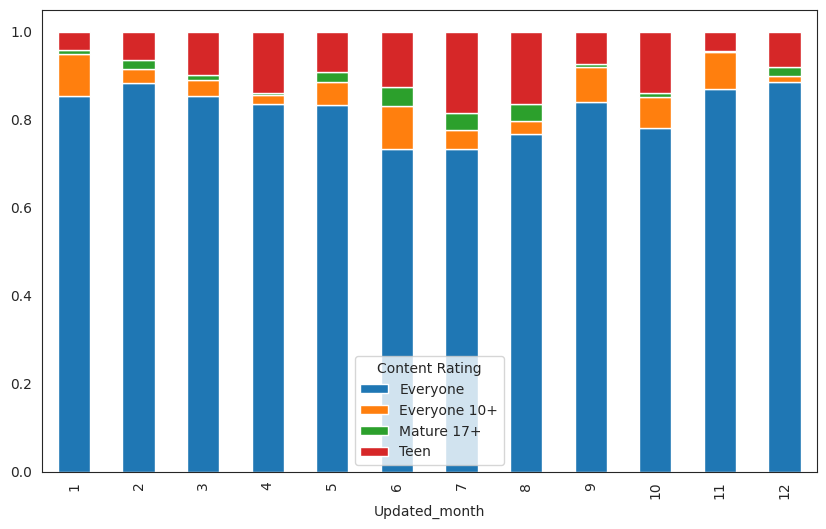

In [162]:
monthly_prec.plot(kind='bar',stacked="True",figsize=[10,6])
plt.show()

#  plotly

In [163]:
res=inp1.groupby(["Updated_month"])[["Rating"]].mean()

In [164]:
res.reset_index(inplace=True)

In [165]:
import plotly.express as pe

In [166]:
fig=pe.line(res, x="Updated_month",y="Rating",title="monthly average rating ")
fig.show()

In [167]:
res


,Updated_month,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148326
4,5,4.153375
5,6,4.172590
6,7,4.222968
7,8,4.271086
8,9,4.041406
9,10,4.012739
